

# Shakespeare's World

### Some results


**Userbase:**

* Top 5 users make up 50% of the comments.
* Top 20 users make up 80% of the comments. 

**Types of forum posts:**

The two most popular subforums are:

1. General comment threads about individual subjects - 77.68%
2. A place to ask for help and report bugs - 8.09%

In total, 85.12% of the posts are about as text. 


**Most commoon outgoing links:**

* www.zooniverse.org, 205
* en.wikipedia.org, 77
* books.google.com, 32
* books.google.co.uk, 31
* panoptes-uploads.zooniverse.org, 19
* www.shakespearesworld.org, 12

---

### Technical details: talkanalyzer methods

To make the notebook a bit cleaner, some functions are imported from the ``talkanalyzer`` module (import as ``ta``). This module could then be re-used for any other Talk page if the format is the same. Note that the module takes a Pandas dataframe as input for the data, so this needs to be installed too. 

**1. Class URLconstructor**

To make URLs from the various data points, some functions are provided: 

```Python
print(ta.URLconstructor.commenturl(700, df)) # Make URL to a comment
print(ta.URLconstructor.threadturl(40565, df)) # Make URL to thread
print(ta.URLconstructor.userurl("Hannebambel", df)) # Make URL to user
```


**2. Class Printer**

For easier printing of information that you need from the data, some printing functions are provided. To print HTML, add the optional flag `html=True` (Boolean set to ``False`` by default):

```Python
ta.Printer.regexpsearch("pippin.*", df) # Search/print regular expression
ta.Printer.usercomments("Hannebambel", df, html=True) # Print html comments from specific user
ta.Printer.thread(20690, df) # Print a thread. 
```

**3. Class TimeSeries**

Returns a time series plot for easy tracking of words and users. By setting the optional flag `plot=False` it instead returns a time series as a dictionary. 

```Python
ta.TimeSeries.regexpsearch('women.*', df) # Returns plot for expression "women" / day.
ta.TimeSeries.usersearch('Cuboctahedron', df, plot=False)# Returns time series as dictionary for user. 
```

**4. Class Network**
Returns a network visualization of various entry-points to the data. The networks are outdegree networks and put either a search term, a user or a hashtag as focal point. 


````Python
ta.Network.hashtaghashtagnetwork(searchstring, df, plot=True, html=False)
ta.Network.hashtagusernetwork(searchstring, df, plot=True, html=False)
ta.Network.regexpusernetwork(searchstring, df, plot=True, html=False)
ta.Network.userhashtagnetwork(searchstring, df, plot=True, html=False)
ta.Network.userusernetwork(searchstring, df, plot=True, html=False)
````

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import talkanalyzer as ta # Requires pandas
import warnings 
warnings.filterwarnings('ignore') # Remove for debugging
import networkx as nx
from itertools import combinations
#help(ta)

In [2]:
# Open Tags data. Not sure what to do with it :D
df2 = pd.read_json("data/project-376-tags_2017-11-21.json")
df2.head()

,comment_id,created_at,id,name,project_id,section,taggable_id,taggable_type,user_id,user_login
0,38469,2015-11-28 00:42:43.782,19835,womanwriter,376,project-376,1168000.0,Subject,255,jules
1,38485,2015-11-28 01:24:38.182,19846,bleedthrough,376,project-376,1170538.0,Subject,255,jules
2,38552,2015-11-28 14:56:49.652,19878,seal,376,project-376,1170267.0,Subject,255,jules
3,38648,2015-11-28 22:49:49.261,19925,womanwriter,376,project-376,1167413.0,Subject,255,jules
4,40304,2015-12-04 12:07:55.064,20840,flourishes,376,project-376,1167413.0,Subject,4032,Noharrr


In [3]:
df = pd.read_json("data/project-376-comments_2017-11-21.json")
df.head()
#df.to_excel("data/project-376-comments_2017-11-21.xlsx")
#df.insert(0, "CommentURL", "")
#df.insert(0, "ThreadURL", "")

,board_description,board_id,board_title,comment_body,comment_created_at,comment_focus_id,comment_focus_type,comment_id,comment_user_id,comment_user_login,discussion_id,discussion_title
0,General comment threads about individual subjects,192,Notes,Can't tell what the red/brown blob on the righ...,2015-11-09 20:50:03.309,1071522.0,Subject,33075,1396273,Sprixie,16496,Subject 1071522
1,General comment threads about individual subjects,192,Notes,"yes i agree, judging by the rough edges round ...",2015-11-10 17:11:02.277,1071522.0,Subject,33406,1813,hightower73,16496,Subject 1071522
2,"Ask us about specific manuscripts, scripts, ha...",195,Questions for the research team,There are only a few documents displaying in t...,2015-11-14 00:41:28.637,NaN,None,34596,1372521,Judy_Prouty,17263,Is this project proceeding?
3,General comment threads about individual subjects,192,Notes,Nothing on here?,2015-11-27 10:39:56.197,1167235.0,Subject,38341,478315,darktruth,19021,Subject 1167235
4,General comment threads about individual subjects,192,Notes,No text or image.,2015-11-27 10:42:46.044,1169357.0,Subject,38342,478315,darktruth,19022,Subject 1169357


In [4]:
#df.comment_user_login.value_counts()
df.comment_user_login.count()

11450

In [5]:
for d in df.iterrows():
    text = d[1][3]
    hashhit = re.findall(r'\#[a-zA-Z0-9]+', text, re.IGNORECASE)
    for h in hashhit:
        threads[(d[1][1],d[1][10])].append(h) # add hashtags

NameError: name 'threads' is not defined

In [ ]:
threads = {}
for d in df.iterrows():
    text = d[1][3]
    urlhit = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', text, re.IGNORECASE)
    for u in urlhit:
        threads[(d[1][1],d[1][10])].append(u) # add links

In [ ]:
print(threads)

In [ ]:
G = nx.Graph()
for key, value in threads.items():
    # the makenetwork function is like this because it isolates the url variable in namespace. 
    def makenetwork(value): 
        templist = []
        for v in value:
            url = "NOLINK"
            if v.startswith("http"):
                url = v
                #print(url)
                #print(v)

            if v.startswith('#'):
                templist.append(v)
            if len(v) > 1:
                for p in combinations(templist, 2):
                    print(p, url)
                    G.add_edge(p[0].lower(), p[1].lower(), uurl = url, link = "https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/" + str(key[0]) + "/" + str(key[1]))
    makenetwork(value)
            
nx.write_gexf(G, "test.gexf") # Test

In [ ]:
mostfrequentusers = df.comment_user_login.value_counts()[0:10] # Increase this if you want more. 
cumulative = 0
counter = 0
for key, value in mostfrequentusers.items():
    counter += 1
    print(str(counter) + ". " + key, 
          str(round(value / len(df) * 100, 2)) + "%")
    cumulative += round(value / len(df) * 100, 2)
    print("\t\t\t\t\tCumulative first " + 
          str(counter) + " users: " + str(cumulative) + "%")

---
## Track a specific user
To track individual users you can use two methods.
1. Print out the users comments.
2. View the user activity over time.

In [25]:
# Print user comments
ta.Printer.usercomments('Sprixie', df)

Analysing user: Sprixie: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/users/Sprixie

1. Sprixie
Can't tell what the red/brown blob on the right side is - could be part of a seal judging by the dark spot on the left side which appears to be on the underside of the paper.
Comment URL: https://www.zooniverse.org/projects/zooniverse/shakespeares-world/talk/192/16496?comment=33075
Date of post: 2015-11-09 20:50:03




In [13]:
# Plot user activity (comments per day.)
ta.TimeSeries.usersearch('jules', df, plot=True)

NameError: name 'ta' is not defined

---
## Search using regular expressions
- Add ``.*`` before or after to get remaining text on each line. 

Regular expression to find most top level domains:
    
    'http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/'

In [14]:
ta.Printer.regexpsearch('herb', df, html=False, context=True)

NameError: name 'ta' is not defined

In [15]:
ta.TimeSeries.regexpsearch('cathol', df)

NameError: name 'ta' is not defined

In [ ]:
# Most common URLs linked. Note: fix regular expression to be more accurate. 
listofURLS = []
for row in df.iterrows():
    topURL = re.findall('http[s]\:\/\/.*\.(?:nl|se|no|es|milru|fr|es|uk|ca|de|jp|au|us|ch|it|io|org|com|net|int|edu|mil|arpa)\/', row[1][3])
    if topURL:
        for t in topURL:
            listofURLS.append(t)
            
from collections import Counter

for key in Counter(listofURLS).most_common(20):
    print(key)

## Thread Analysis

1. Longest threads
2. Print each thread by id number

In [19]:
# Longest threads
df.discussion_id.value_counts()[0:15]

28632     71
57041     67
20628     60
38466     52
20496     46
27526     39
41673     33
21331     32
252424    31
209315    30
154452    29
20872     27
37559     24
19237     24
25382     23
Name: discussion_id, dtype: int64

In [15]:
# A particular forum thread
ta.Printer.thread(57041, df)

AttributeError: type object 'URLconstructor' has no attribute 'threadturl'

In [16]:
# Calculate how many percent of comments are "subject related (related to texts)
print(str(round(df.comment_focus_type.count() / df.comment_body.count(), 4) * 100) + "%")

86.1%


In [ ]:
# Sum of posts in each subforum.
for key, value in df.board_description.value_counts().items():
    print(key, value)
    print(str(round(value/len(df), 4) * 100) + "%\n")

## Entire dataset: time series

In [ ]:
def postsTimeSeries():
    '''Create a time series based on posts per day
    using the dfT dataframe (index by datetime)'''
    dfT = df
    pd.created_at = pd.to_datetime(dfT.comment_created_at, format='%H:%M') # Lite fulparsning av tidsstämpel här.
    dfT.index = pd.created_at
  
    postsperday = dfT.resample('1440T', base=60).count() #1440 min./day

    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)

    plt.title('Shakespeare\'s World: Forum posts per day', size=16)

    postsperday['comment_body'].plot() #Plot each individual tweet per minute
    
    plt.xlabel('Date')
    plt.ylabel('Posts')

postsTimeSeries()

In [ ]:
def postsDailyAverage():
    '''Create a time series based on posts per day
    using the dfT dataframe (index by datetime)'''
    dfT = df
    pd.created_at = pd.to_datetime(dfT.comment_created_at, format='%H:%M') # Lite fulparsning av tidsstämpel här.
    dfT.index = pd.created_at
  
    postsperday = df
    
    
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)

    plt.title('Shakespeare\'s World: Forum posts per hour', size=16)

    plt.plot(postsperday.index.time, 'ro')
    
    #plt.xlabel('Time')
    #plt.ylabel('Posts')

postsDailyAverage()

## Network analysis

### Complete dataset: User thread-network
Create gexf network file. Note. This is very bloated and it is better to create small networks with the functions below. 

In [ ]:
#from gexf import * # https://github.com/paulgirard/pygexf
def createThreadUserNet(dataframe):
    # Intialize network file
    gexf = Gexf("Shakespeares World", "Thread User Network")
    graph = gexf.addGraph("directed", "static", "Thread User directed network")

    # Create nodes
    for user in df.comment_user_login.iteritems():
        graph.addNode(str(user[1]), str(user[1]))

    for thread in df.discussion_id.iteritems():
        graph.addNode(str(thread[1]), str(thread[1]))

    # Create edges
    counter = 0
    for x in df.iterrows():
        counter += 1
        #print(x[1][9]) # Username
        # print(x[1][10]) # Comment thread ID
        graph.addEdge(str(counter), str(x[1][9]), str(x[1][10]))

    # Write file. Note: all nodes and edges need to be added as unicode strings
    output_file = open("shakspearesworldThreadUserNet.gexf","wb")
    gexf.write(output_file)

#createThreadUserNet(df)

## Section networks: users, hashtag, regexpsearches

There are five types of networks that can be created in the ``ta.Network`` class, each of them described in order:

````Python
hashtaghashtagnetwork(searchstring, df, plot=True, html=False)
hashtagusernetwork(searchstring, df, plot=True, html=False)
regexpusernetwork(searchstring, df, plot=True, html=False)
userhashtagnetwork(searchstring, df, plot=True, html=False)
userusernetwork(searchstring, df, plot=True, html=False)
````

### Hashtag/hashtag network
This network creates one hashtag in the middle, then plots all other hashtags that co-occur in the same post connects them. The more frequent the co-occurrence, the closer to the middle search string. 

Searching for: #herbs
#herbs 7
#medicine 3
#cooking 2
#medicines 2
#womanwriter 2
#v 1
#recipe 1
#ordinaryhistory 1
-----
Total value: 19
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 2.0
Seventyfive percentile: 2.25
Ninety percentile: 4.2
Total users: 8


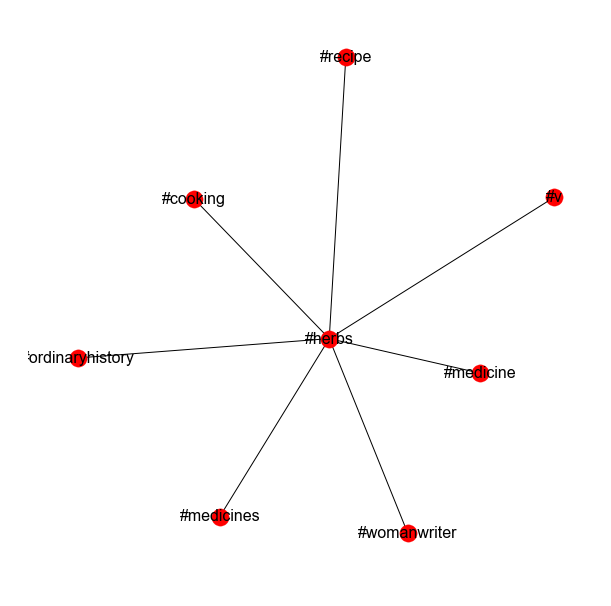

In [6]:
ta.Network.hashtaghashtagnetwork("#herbs", df)

### Hashtag/user network
This takes a hashtag and then plots a network based on which users that has written about it in the forum. The closer to the center concept, the more often the users write about it. 

Searching for: #catholic
VVH 34
mutabilitie 15
parsfan 10
IntelVoid 5
schub 5
Traceydix 4
Cuboctahedron 3
Christoferos 3
joolslee 2
dhaunsperger 2
brownfox 2
Hannebambel 1
kodemunkey 1
edtechgirl 1
spock42 1
jules 1
Lynzw 1
carl801 1
emilyewahl 1
-----
Total value: 93
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 2.0
Seventyfive percentile: 4.5
Ninety percentile: 11.0
Total users: 19


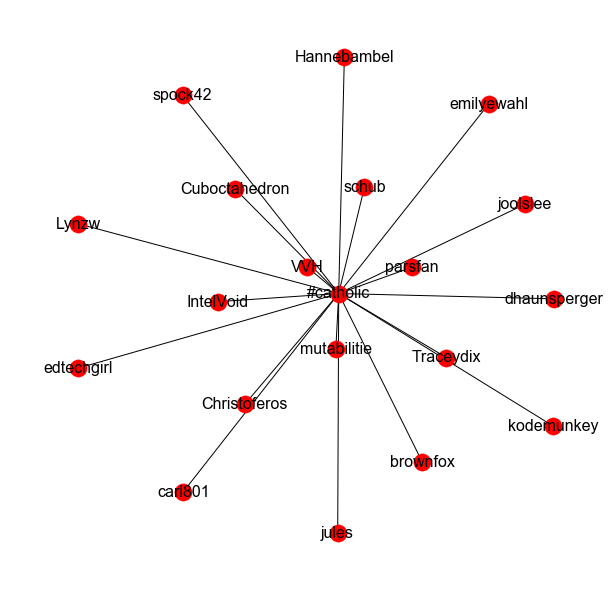

In [8]:
ta.Network.hashtagusernetwork("#catholic", df, plot=True, html=False)


### Regexp/user network
Similar to the hashtag/user network but using the power of Python flavoured regexps. Case insensivive. 

In [20]:
list(range(72))


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71]

Searching for: packe
Cuboctahedron 46
griddlesticks 2
jules 2
fromere 1
Traceydix 1
IntelVoid 1
Dizzy78 1
hwolfe 1
mutabilitie 1
Woo-H 1
Total value: 57
Ten percentile: 1.0
Twentyfive percentile: 1.0
Fifty percentile: 1.0


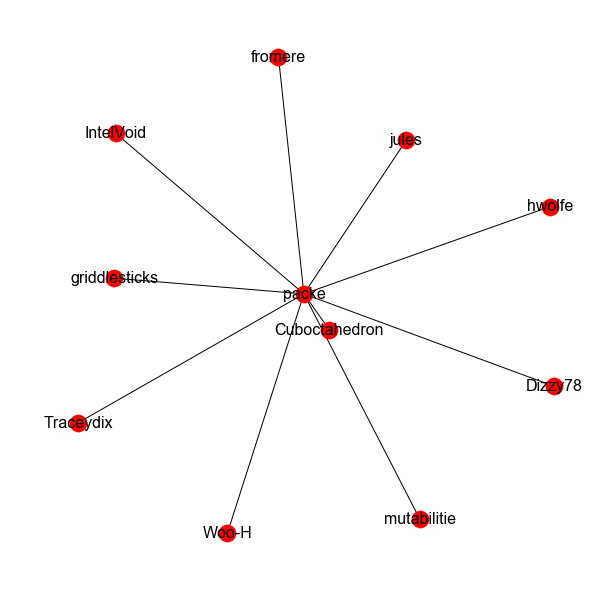

In [5]:
ta.Network.regexpusernetwork("packe", df)

In [ ]:
ta.Network.regexpusers("copyright", df, data=True) #returns data for plotting

### User/hashtag network
Tracks what hashtag a specific username writes. 

#letter 48
#medicine 27
#recipe 21
#latin 11
#bleedthrough 10
#index 10
#catholics 9
#paper 8
#womanwriter 4
#catholic 3
#contents 3
#Catholic 2
#religion 2
#recipes 2
#cambridgeuniversity 1
#chickensoup 1
#chetwynd 1
#wedding 1
#warrant 1
#medicines 1
#Ireland 1
#courtletter 1
#Catholics 1
#s 1
#recusants 1
#ireland 1
#Cromwell 1
#badcatalogue 1
#french 1
#animals 1
Total value: 176


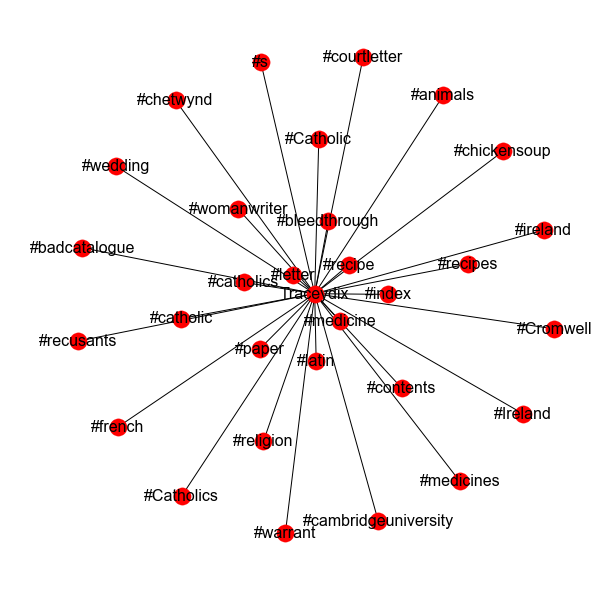

In [6]:
ta.Network.userhashtagnetwork("Traceydix", df)

### User/user network
Takes a specific user and draws a network from the users spoken to, using the @username convention. 

This is an out-degree network. 

** Todo **: make in-degree network to see which users address a user (comparable to incoming @-tweets on Twitter). 

In [ ]:
ta.Network.userusernetwork("VVH", df)